In [1]:
from env import github_token, github_username
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from os import path
from requests import get
from sklearn.model_selection import train_test_split
from typing import Dict, List, Optional, Union, cast
from wordcloud import WordCloud
import prepare as p

import json
import matplotlib.pyplot as plt
import nltk
import nltk.sentiment
import numpy as np
import os
import pandas as pd

import re
import requests
import seaborn as sns
import time
import unicodedata

In [2]:
large_scraped_data = pd.read_csv('large_scraped_data.csv')

In [3]:
large_scraped_data = large_scraped_data.dropna()

In [4]:
large_scraped_data = large_scraped_data.drop(columns='Unnamed: 0')

In [5]:
df=large_scraped_data

In [6]:
extra_stops = ['&#9;', "' ", " '", "'",'Minecraft','minecraft','minecraft ',' minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'version', 'file']

def prep_readme_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the repo name, original text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df = df.dropna()
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords,
                                  extra_words=extra_words,
                                  exclude_words=exclude_words)
    
    
    df['lemmatized'] = df['clean'].apply(lemmatize)
    
    df = map_other_languages(df)
    
    return df

In [7]:
clean_df = p.prep_readme_data(df,'readme_contents', extra_words = extra_stops, exclude_words=[])

Removed 148 stopwords
---
Removed 4500 stopwords
---
Removed 205 stopwords
---
Removed 498 stopwords
---
Removed 152 stopwords
---
Removed 75 stopwords
---
Removed 8 stopwords
---
Removed 1371 stopwords
---
Removed 207 stopwords
---
Removed 35 stopwords
---
Removed 321 stopwords
---
Removed 219 stopwords
---
Removed 243 stopwords
---
Removed 246 stopwords
---
Removed 174 stopwords
---
Removed 222 stopwords
---
Removed 93 stopwords
---
Removed 72 stopwords
---
Removed 196 stopwords
---
Removed 222 stopwords
---
Removed 10 stopwords
---
Removed 133 stopwords
---
Removed 12 stopwords
---
Removed 197 stopwords
---
Removed 652 stopwords
---
Removed 2166 stopwords
---
Removed 123 stopwords
---
Removed 583 stopwords
---
Removed 637 stopwords
---
Removed 206 stopwords
---
Removed 698 stopwords
---
Removed 130 stopwords
---
Removed 69 stopwords
---
Removed 117 stopwords
---
Removed 254 stopwords
---
Removed 1149 stopwords
---
Removed 127 stopwords
---
Removed 215 stopwords
---
Removed 73 stopwo

In [9]:
clean_df.head()

,repo,language,readme_contents,clean,lemmatized
0,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,simple minecraftinspired demo written python p...,simple minecraftinspired demo written python p...
1,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
2,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,overviewer build status andrew brown contribut...,overviewer build status andrew brown contribut...
3,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
4,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...


In [ ]:
def map_other_languages(df):
    '''
    This function takes in a df with 'languages' column
    containing the coding language of the repo. Any language
    that is not Python, Java, or JavaScript will be marked
    as 'Other'
    '''
    top_languages = ['Python', 'Java', 'JavaScript']
    df.loc[~df['language'].isin(top_languages), 'language'] = 'Other'
    
    return df

In [ ]:
df=map_other_languages(df)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

In [ ]:
clean_df

In [ ]:
def basic_clean(string):
    '''
    This functions are the first steps that 
    cleans up the initial phrase
    '''
    #make everything lowercase
    string = string.str.lower()
    
    #text needs to be unified-normalized (remove inconsistencies. in unicode), 
    #encode(convert to ascii, ignore and drop anything not ascii), ignore, if you can not encode/decode
    #decode(turn the bytes back into string)
    string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # substitute anything in the [] that is not^ a letter(a-z) or space, with a space
    string = re.sub('[^a-z\s]', '', string)
    
    #return cleaned item
    return(string)

In [ ]:
def tokenize(string):
    '''This function takes in selected string and returns tokenized(separated) string'''
    #create tokenizer to break words and punctuation left over into dicrete units...separated
    tokenize = nltk.tokenize.ToktokTokenizer()
    
    #apply and save back tokenized item
    string = tokenize.tokenize(string, return_str=True)
    
    #return tokenized item
    return(string)

In [ ]:
cleaned_and_tok = tokenize(cleaned_words)

In [ ]:
def lemmatize(string):
    '''
    This function takes in a string as an input
    then lemmatizes all words in the string.
    '''
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    string_lemmatized = ' '.join(lemmas)

    return string_lemmatized

In [ ]:
lemmatized = lemmatize(cleaned_words)

In [ ]:
extra_words = ['minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www']

def remove_stopwords(string, extra_words= extra_words, exclude_words=[]):
    '''
    This function takes in a string as an input
    then removes stopwords. The function has two
    additional parameters that define additional
    stopwords to remove in extra_words as a list,
    and defines stopwords to exclude from removal
    in exlude_words as a list. extra_words and
    exclude_words are empty lists by default.
    '''
    stopword_list = stopwords.words('english')
    stopword_list = set(stopword_list) - set(exclude_words)
    stopword_list = stopword_list.union(set(extra_words))
    
    words = string.split()
    
    filtered_words = [w for w in words if w not in stopword_list]

    print('Removed {} stopwords'.format(len(words) - len(filtered_words)))
    print('---')

    string_without_stopwords = ' '.join(filtered_words)

    return string_without_stopwords


In [ ]:
df['super_clean'] = super_clean = remove_stopwords(lemmatized, extra_words= extra_words, exclude_words=[])

In [ ]:
df.head()

In [ ]:
python_words = basic_clean(' '.join(df[df.language == 'Python']['readme_contents']))

In [ ]:
df['super_cleaned']= remove_stopwords(lemmatized, extra_words = [], exclude_words= [])

In [ ]:
dfpy = df[df.language == 'Python']
py_readmes = ' '.join(dfpy['super_cleaned'])

In [ ]:
dfjv = df[df.language == 'Java']
jv_readmes = ' '.join(dfjv['super_cleaned'])

In [ ]:
dfjs = df[df.language == 'JavaScript']
js_readmes = ' '.join(dfjs['super_cleaned'])

In [ ]:
java_words = basic_clean(' '.join(df[df.language == 'Java']['readme_contents']))

In [ ]:
javascript_words = basic_clean(' '.join(df[df.language == 'JavaScript']['readme_contents']))

In [ ]:
words=tokenize(words)

In [ ]:
df['lemmatized'] = lemmatize(words)

In [ ]:
remove_stopwords(string, extra_words= extra_words, exclude_words=[])

In [ ]:
df = map_other_languages(df)

In [ ]:
df

In [ ]:
def prep_readme_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function takes in a df and the string name for a text column with 
    the option to pass lists for extra_words and exclude_words and
    returns a df with the repo name, original readme text, and cleaned-tokenized- 
    lemmatized readme text with stopwords removed.
    '''
    df = df.dropna()
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords,
                                  extra_words=extra_words,
                                  exclude_words=exclude_words)
    
    
    df['lemmatized'] = df['clean'].apply(lemmatize)
    
    df = map_other_languages(df)
    
    return df

In [ ]:
df=prep_readme_data(large_scraped_data, 'readme_contents', extra_words= extra_words, exclude_words=[])

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.language.value_counts()

In [ ]:
def split_minecraft_data(df):
    '''
    This function performs split on minecraft repo data, stratified on language.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test



In [ ]:
train, validate, test = split_minecraft_data(df)

In [ ]:
train

In [ ]:
extra_words = ['minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'server', 'version', 'mod', 'file']


def remove_stopwords(string, extra_words = extra_words, exclude_words= []):
    '''function to remove stopwords and additional stop words to include, and any words that we don't want to remove'''
    #variable that refers to a list of stopwords in english from nltk
    stopwords_list=stopwords.words('english')
    
    #use the set() constructor to make a set (no dupes in a set)
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # add in any extra words to my stopwords set using a union
    stopword_list = stopword_list.union(set(extra_words))
    
    # split our document by spaces
    words = string.split()
    
    # every word in our document, as long as that word is not in our stopwords
    filtered_words = [word for word in words if word not in stopword_list]
    
    # join the strings back together
    string_without_stopwords = ' '.join(filtered_words)
    
    #return w/o stopwords with strings joined
    return(string_without_stopwords)

In [ ]:
lemma_readmes = ' '.join(train['lemmatized'])

In [ ]:
lemma_readmes

In [ ]:
lemma_freq = pd.Series(lemma_readmes.split()).value_counts()

In [ ]:
lemma_freq.head(25)

In [ ]:
dfpy = train[train.language == 'Python']
py_readmes = ' '.join(dfpy['lemmatized'])

In [ ]:
dfjv = train[train.language == 'Java']
java_readmes = ' '.join(dfjv['lemmatized'])

In [ ]:
dfjs = train[train.language == 'JavaScript']
js_readmes = ' '.join(dfjs['lemmatized'])

In [ ]:
py_words = pd.Series(py_readmes.split()).value_counts()

In [ ]:
py_words

In [ ]:
java_words = pd.Series(java_readmes.split()).value_counts()

In [ ]:
java_words

In [ ]:
javascript_words = pd.Series(js_readmes.split()).value_counts()

In [ ]:
javascript_words

In [ ]:
all_minecraft_bigrams = (pd.Series(nltk.ngrams(lemma_readmes.split(), 2)).value_counts())

In [ ]:
all_minecraft_bigrams

In [ ]:
py_bigrams = (pd.Series(nltk.ngrams(py_readmes.split(), 2)).value_counts())

In [ ]:
py_bigrams

In [ ]:
jv_bigrams = (pd.Series(nltk.ngrams(java_readmes.split(), 2)).value_counts())

In [ ]:
jv_bigrams

In [ ]:
js_bigrams = (pd.Series(nltk.ngrams(js_readmes.split(), 2)).value_counts())

In [ ]:
js_bigrams

In [ ]:
py_trigrams = (pd.Series(nltk.ngrams(py_readmes.split(), 3)).value_counts())

In [ ]:
py_trigrams

In [ ]:
jv_trigrams = (pd.Series(nltk.ngrams(java_readmes.split(), 3)).value_counts())

In [ ]:
jv_trigrams

In [ ]:
js_trigrams = (pd.Series(nltk.ngrams(js_readmes.split(), 3)).value_counts())

In [ ]:
js_trigrams

In [ ]:
extra_words = ['minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'server', 'version', 'mod', 'file']

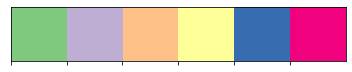

In [10]:
mpl_palette_named_palette = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
                             'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 
                             'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 
                             'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 
                             'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
                             'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
                             'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
                             'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
                             'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
                             'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
                             'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
                             'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
                             'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
                             'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
                             'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
                             'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
                             'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 
                             'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
                             'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
                             'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 
                             'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
                             'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
                             'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

sns_named_palettes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']

sns.palplot(sns.mpl_palette("Accent"))

In [12]:
sns.choose_colorbrewer_palette('diverging')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

In [13]:
print(sns.xkcd_rgb)

{'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54ac68', 'algae green': '#21c36f', 'almost black': '#070d0d', 'amber': '#feb308', 'amethyst': '#9b5fc0', 'apple': '#6ecb3c', 'apple green': '#76cd26', 'apricot': '#ffb16d', 'aqua': '#13eac9', 'aqua blue': '#02d8e9', 'aqua green': '#12e193', 'aqua marine': '#2ee8bb', 'aquamarine': '#04d8b2', 'army green': '#4b5d16', 'asparagus': '#77ab56', 'aubergine': '#3d0734', 'auburn': '#9a3001', 'avocado': '#90b134', 'avocado green': '#87a922', 'azul': '#1d5dec', 'azure': '#069af3', 'baby blue': '#a2cffe', 'baby green': '#8cff9e', 'baby pink': '#ffb7ce', 'baby poo': '#ab9004', 'baby poop': '#937c00', 'baby poop green': '#8f9805', 'baby puke green': '#b6c406', 'baby purple': '#ca9bf7', 'baby shit brown': '#ad900d', 'baby shit green': '#889717', 'banana': '#ffff7e', 'banana yellow': '#fafe4b', 'barbie pink': '#fe46a5', 'barf green': '#94ac02', 'barney': '#ac1db8', 'barney purple': '#a00498', 'battleship grey': '#6b7c85', 'beige': '#e6daa6', 'be

In [14]:
print(sns.crayons)

{'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot': '#FDD9B5', 'Aquamarine': '#78DBE2', 'Asparagus': '#87A96B', 'Atomic Tangerine': '#FFA474', 'Banana Mania': '#FAE7B5', 'Beaver': '#9F8170', 'Bittersweet': '#FD7C6E', 'Black': '#000000', 'Blue': '#1F75FE', 'Blue Bell': '#A2A2D0', 'Blue Green': '#0D98BA', 'Blue Violet': '#7366BD', 'Blush': '#DE5D83', 'Brick Red': '#CB4154', 'Brown': '#B4674D', 'Burnt Orange': '#FF7F49', 'Burnt Sienna': '#EA7E5D', 'Cadet Blue': '#B0B7C6', 'Canary': '#FFFF99', 'Caribbean Green': '#00CC99', 'Carnation Pink': '#FFAACC', 'Cerise': '#DD4492', 'Cerulean': '#1DACD6', 'Chestnut': '#BC5D58', 'Copper': '#DD9475', 'Cornflower': '#9ACEEB', 'Cotton Candy': '#FFBCD9', 'Dandelion': '#FDDB6D', 'Denim': '#2B6CC4', 'Desert Sand': '#EFCDB8', 'Eggplant': '#6E5160', 'Electric Lime': '#CEFF1D', 'Fern': '#71BC78', 'Forest Green': '#6DAE81', 'Fuchsia': '#C364C5', 'Fuzzy Wuzzy': '#CC6666', 'Gold': '#E7C697', 'Goldenrod': '#FCD975', 'Granny Smith Apple': '#A8E4A0', 'Gray'

[(0.10196078431372549, 0.2823529411764706, 0.4627450980392157), (0.7843137254901961, 0.2196078431372549, 0.35294117647058826)]


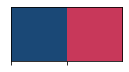

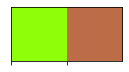

In [15]:
p = sns.crayon_palette(["Midnight Blue", "Maroon"])
print(p)
sns.palplot(p)
sns.palplot(sns.xkcd_palette(["acid green", "adobe"]))

In [ ]:
sns.set_palette

In [ ]:
sns.set_palette(
    palette="magma",
    n_colors=3,
)

In [ ]:
rgb = [(0.15, 0.25, 0.35), (0.35, 0.55, 0.51), (0.5, 0.95, 0.34)]

In [ ]:
sns.palplot(sns.blend_palette(rgb))
sns.palplot(sns.blend_palette(rgb, n_colors=10))